In [68]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os

In [69]:
# plot settings

plt.rcParams['axes.facecolor'] = '050d1c'
plt.rcParams['figure.facecolor'] = '050d1c'
plt.rcParams['figure.edgecolor'] = 'ffffff'
plt.rcParams['axes.edgecolor'] = 'ffffff'
plt.rcParams['axes.labelcolor'] = 'ffffff'
plt.rcParams['axes.titlecolor'] = 'ffffff'
plt.rcParams['xtick.color'] = 'ffffff'
plt.rcParams['ytick.color'] = 'ffffff'
plt.rcParams['text.color'] = 'ffffff'
plt.rcParams['grid.color'] = '555555'

In [63]:
# read export.csv

if not os.path.exists('export.csv'):
    # unzip data.zip
    import zipfile
    with zipfile.ZipFile('data.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

df = pd.read_csv('export.csv', index_col=0)
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values(by='time')
df = df.iloc[::10, :] # reduce number of data points


C:\Users\louis\AppData\Local\Temp\ipykernel_15928\3508487226.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('export.csv', index_col=0)


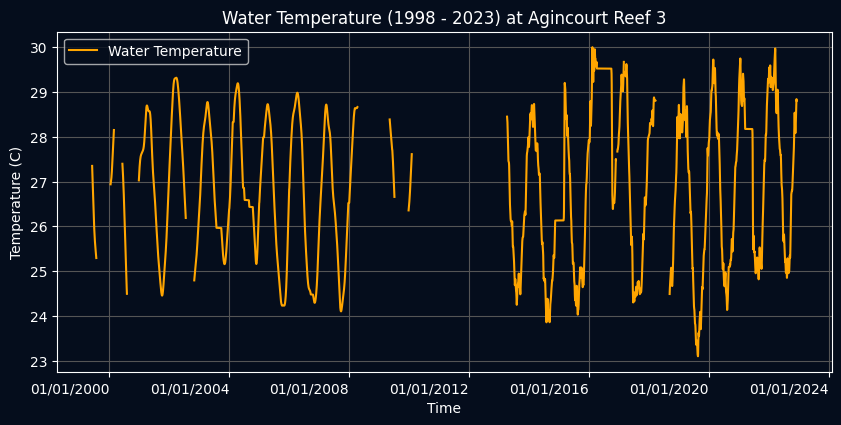

In [70]:
from matplotlib.dates import DateFormatter

df = df[['qc_value', 'time']]
# remove dates before 1998
df = df[df['time'] > '1998-01-01']

df['qc_value'] = df['qc_value'].rolling(100).mean()
# plot
df.plot(x='time', y='qc_value', figsize=(10, 5), color='orange', label='Water Temperature')
# set date format
plt.gca().xaxis.set_major_formatter(DateFormatter('%d/%m/%Y'))
plt.title('Water Temperature (1998 - 2023) at Agincourt Reef 3')
plt.xlabel('Time')
plt.ylabel('Temperature (C)')
# rotate x-axis labels
plt.xticks(rotation=0)
plt.grid(True)
plt.savefig('TT', dpi=300)
plt.show()

<AxesSubplot: xlabel='time'>

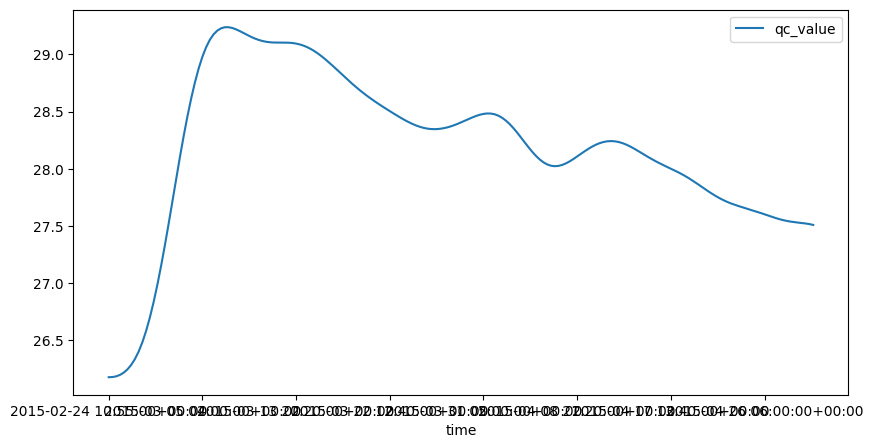

In [ ]:
df = df[df['time'] > '2015-01-01']
df = df[df['time'] < '2015-05-01']
df.plot(x='time', y='qc_value', figsize=(10, 5))